# Principal Component Analysis of the Biolog Data
## 607 linage

After processing the data according to our normalization and filtering protocol, we perform dimensionality reduction using PCA.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import interpolate
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D
import sys
from pylab import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import os 

#Functions
def talus(singular):
    talo=[]
    for i in range(0,len(singular)-2):
        value=log(singular[i])-log(singular[i+1])
        talo.append(value)
    return talo       

First, we will look at the data of the clones derived from the ancestral population for both linages.

In [109]:
#Load the data
name="normalized607Wells86&94RemovedBiologData.csv"
df=pd.read_csv(name)
temperature = df.Condition.values #Or any other factor
strain = df.Strain.values
biolog=pd.read_csv("gen_biolog .csv")
dictbio=biolog.set_index('Well').to_dict()
df.columns=df.columns.to_series().map(dictbio['Assay'])
#for PCA
data=df.iloc[:,6:]
X = df.iloc[:,6:].values
#To log transform with an offset
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X=transformer.transform(X)

Given the talus plot, we can see that the variability of our data is mostly explained with 4 principal components.

<IPython.core.display.Javascript object>


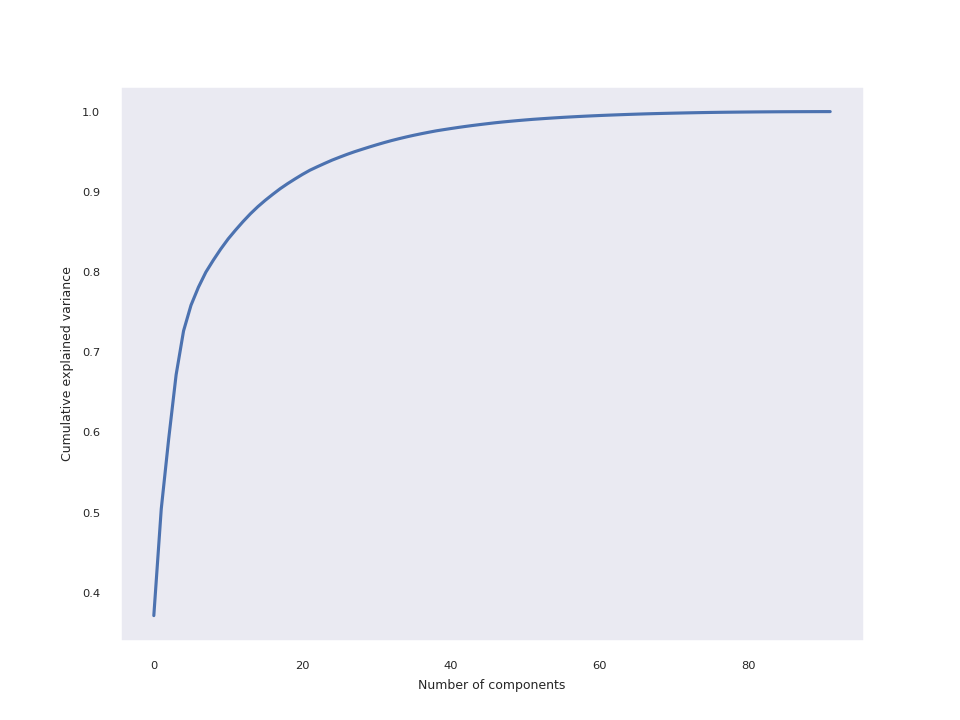

In [110]:
%matplotlib notebook
#PCA
pca = PCA()
X_reduced = pca.fit_transform(scale(X,with_std=True))
#Variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.grid();
#plt.xticks(np.arange(0, 50, step=2));

<IPython.core.display.Javascript object>


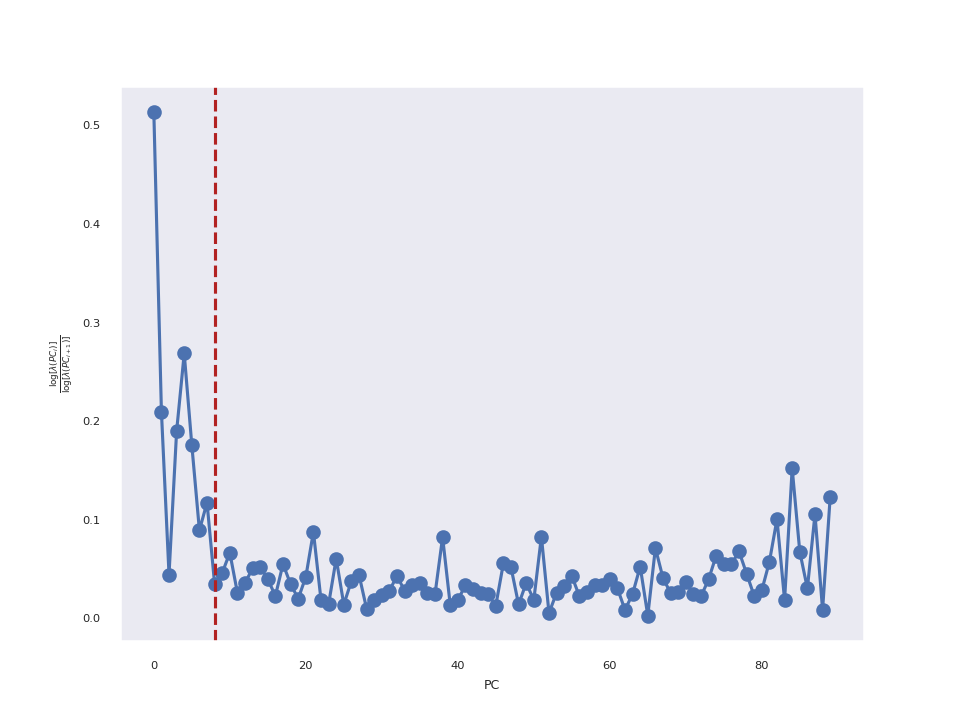

In [124]:
%matplotlib notebook
#Talus Plot
tal=talus(pca.singular_values_)
plot(tal,'o-')
plt.xlabel('PC')
plt.ylabel(r"$\frac{\log\left[{\lambda\left(PC_i\right)}\right]}{\log\left[{\lambda\left(PC_{i+1}\right)}\right]}$");
plt.grid();
#plt.xticks(np.arange(0, 32, step=2));
plt.axvline(x=8, linestyle = '--', color = 'firebrick')

#Save
pp = PdfPages('607_talus.pdf')
plt.savefig(pp,format='pdf')
pp.close()


We will first inspect the first three principal components.

In [112]:
#Get the ancestral values
X_ancestor=X_reduced[0:17,:]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_ancestor)
# Get the cluster centroids
centers = kmeans.cluster_centers_

<IPython.core.display.Javascript object>


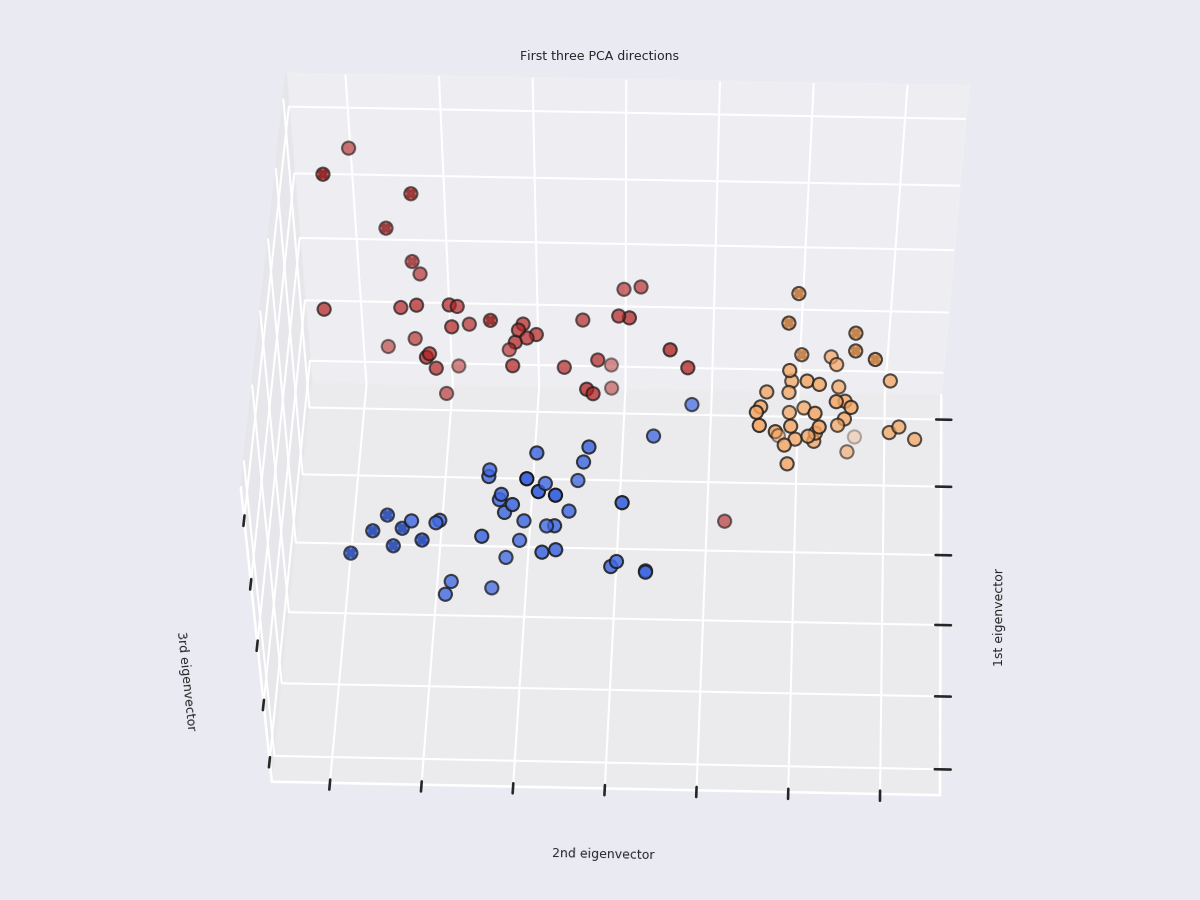

In [125]:
%matplotlib notebook
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#Color by factor
colors1 = ['royalblue','sandybrown', 'firebrick']
y1= pd.Series(temperature, dtype="category")
lut = dict(zip(y1.unique(), colors1))
colors=y1.map(lut)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=colors,
          cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

#Add ancestral
ax.scatter(X_ancestor[:, 0], X_ancestor[:, 1],X_ancestor[:, 2], color='black', edgecolor='k',marker="X")

The samples are separated well by both temperature and strain.

<IPython.core.display.Javascript object>


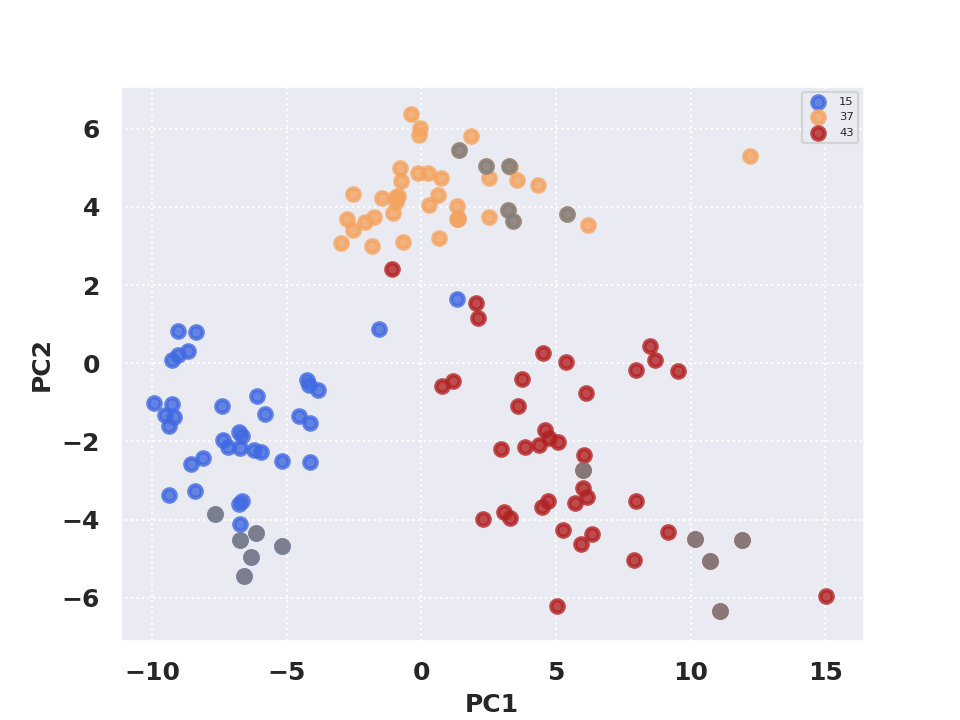

In [114]:
%matplotlib notebook
# Create 3 different clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_reduced)
# Get the cluster centroids
centers = kmeans.cluster_centers_

# 2D PCA
ig, ax = plt.subplots()
colors = ['royalblue', 'sandybrown', 'firebrick']
lw = 2
conditions=unique(temperature)


for color, i, conditions in zip(colors, [15, 37, 43], conditions):
    plt.scatter(X_reduced[temperature == i, 0], X_reduced[temperature == i, 1], color=color, alpha=.8, lw=lw,
                label=conditions)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(linestyle='dotted')

# Overlay the centroids on the scatter plot
ax.set_xlabel('PC1',fontsize=12, fontweight='bold')
ax.set_ylabel('PC2',fontsize=12, fontweight='bold')
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
     tick.label1.set_fontsize(fontsize)
     tick.label1.set_fontweight('bold')

#Add ancestral
plt.scatter(X_ancestor[:, 0], X_ancestor[:, 1], color='grey', alpha=.8, lw=lw)


PC1 separates the three temperatures, PC2 separates the perturbed temperatures from the optimal.

<IPython.core.display.Javascript object>


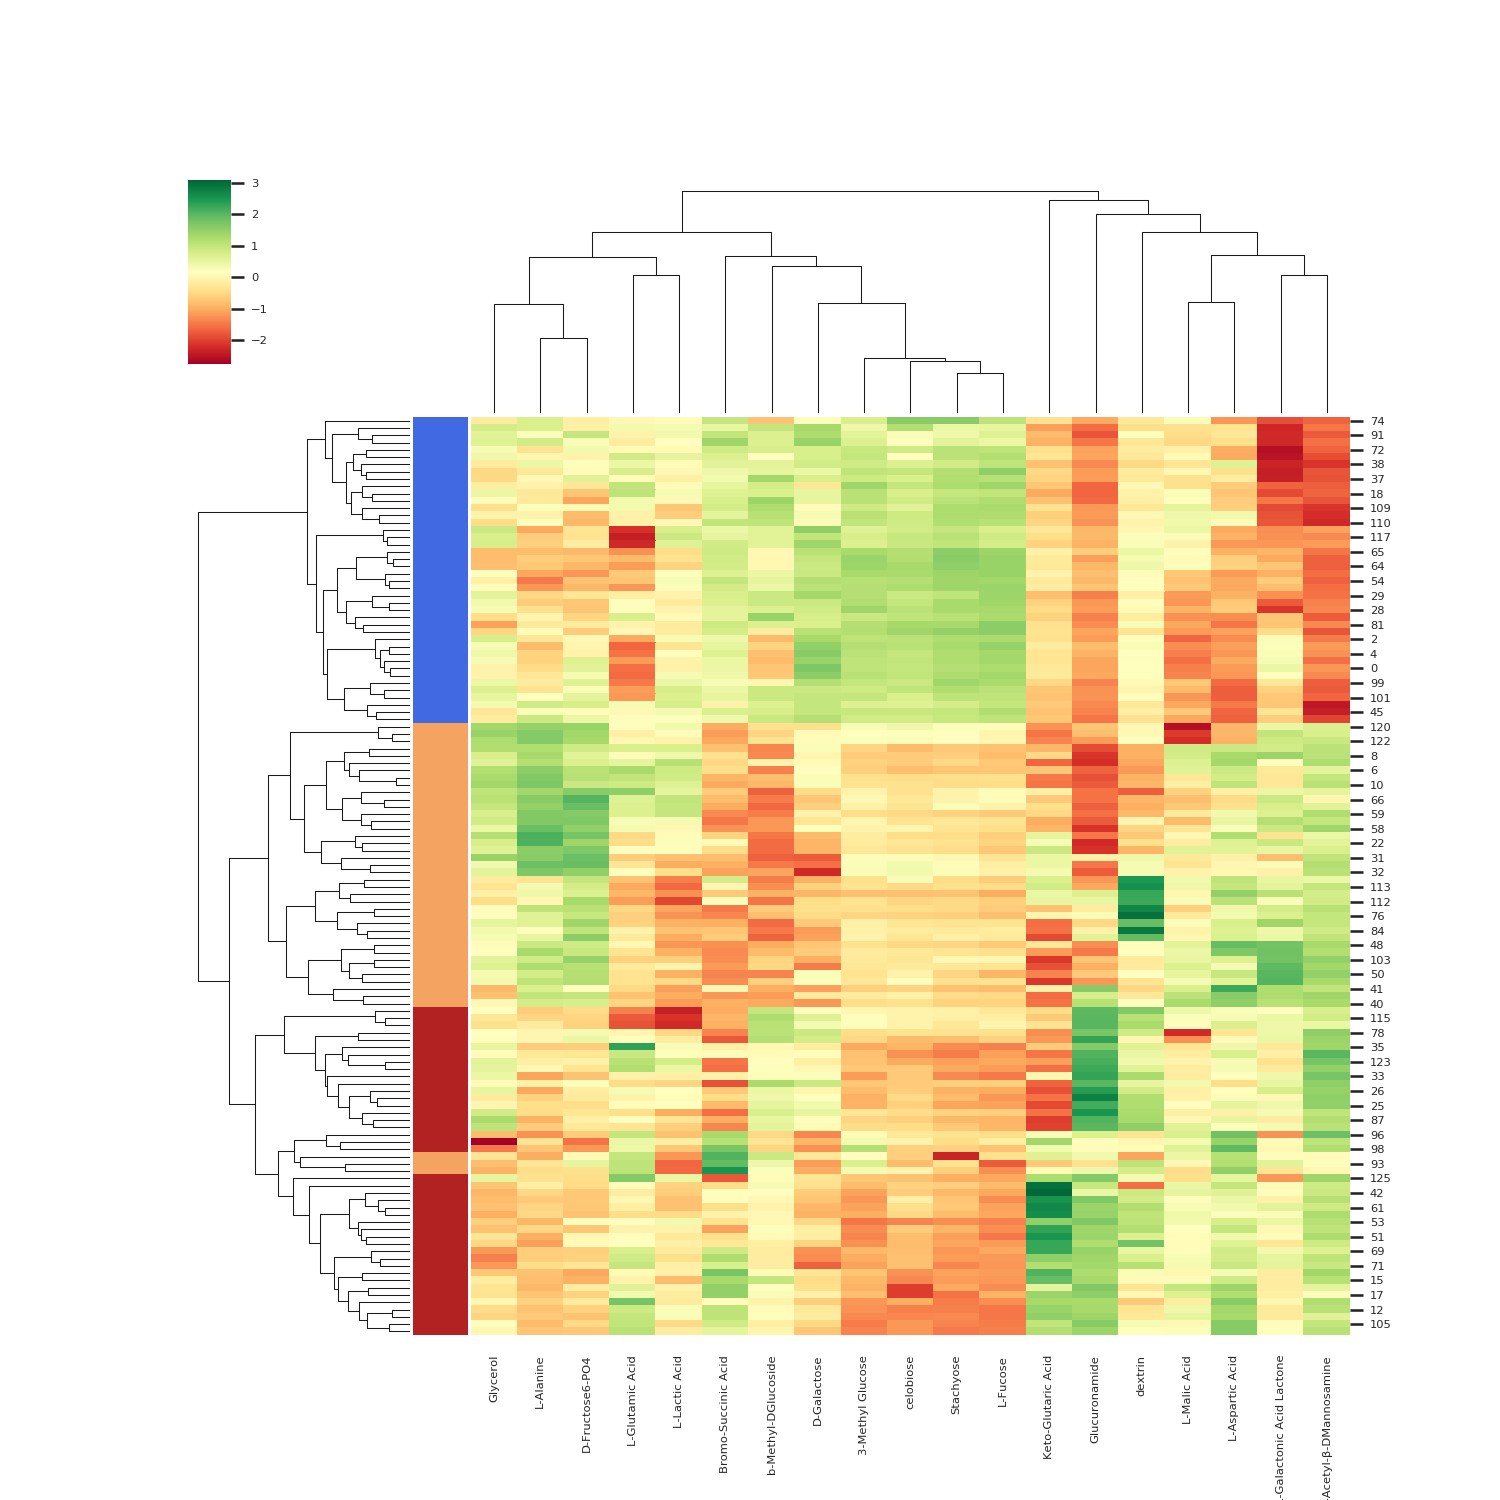

In [115]:
%matplotlib notebook
#Inspect each PC and look at the top wells, cluster them and inspect treatment
loadings = np.absolute(pca.components_)
percent=int(floor(0.8*len(loadings[0])))
order=np.argsort(loadings[0])
pc1=data.iloc[:,order[percent:len(loadings[0])]]
#Color by factor
colors1 = ['royalblue','sandybrown', 'firebrick']
y1= pd.Series(temperature, dtype="category")
lut = dict(zip(y1.unique(), colors1))
colors=y1.map(lut)
#We can see how these variables effectively cluster our data
sns.set(font_scale=0.5) 
sns.clustermap(pc1,cmap="RdYlGn",row_colors=colors.values,z_score=0)
#Save
pp = PdfPages('pc1_clust_607.pdf')
plt.savefig(pp,format='pdf')
pp.close()

<IPython.core.display.Javascript object>


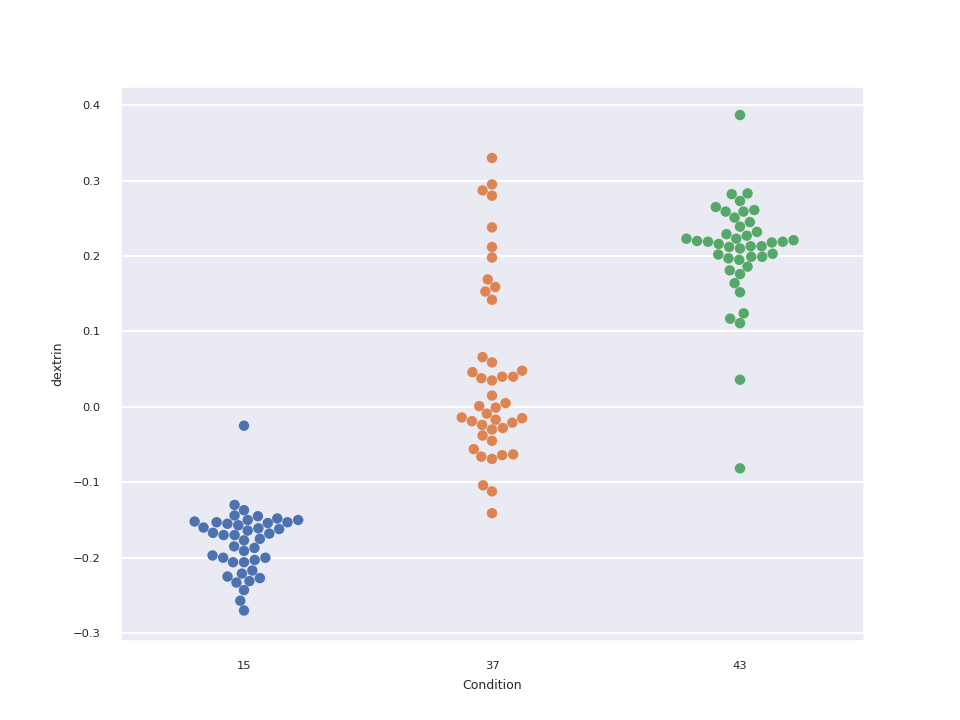

In [17]:
%matplotlib notebook
sns.swarmplot(x='Condition',y='dextrin',data=df)

<IPython.core.display.Javascript object>


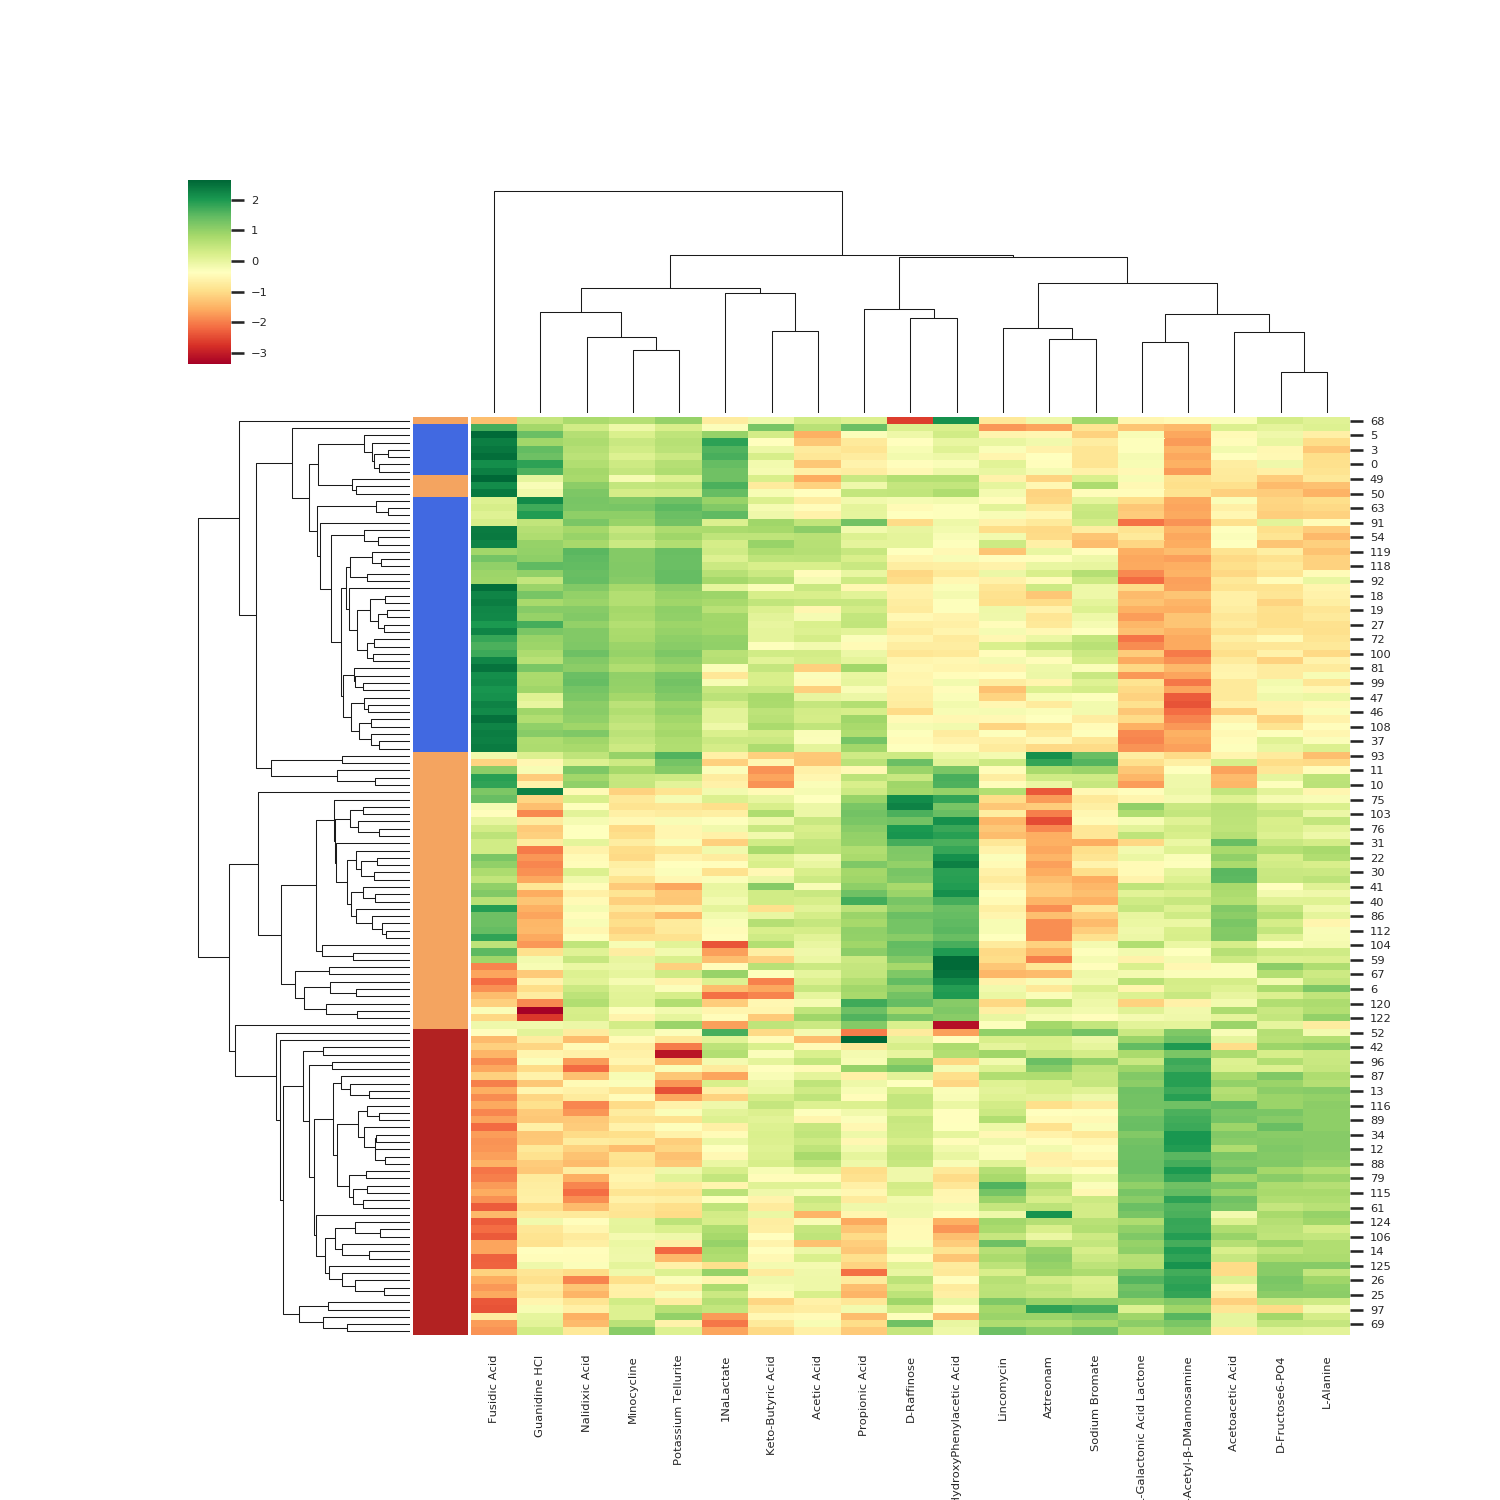

In [29]:
%matplotlib notebook
#Inspect each PC and look at the top wells, cluster them and inspect treatment
loadings = np.absolute(pca.components_)
percent=int(floor(0.8*len(loadings[1])))
order=np.argsort(loadings[1])
pc1=data.iloc[:,order[percent:len(loadings[1])]]
#Color by factor
colors1 =  ['royalblue','sandybrown', 'firebrick']
y1= pd.Series(temperature, dtype="category")
lut = dict(zip(y1.unique(), colors1))
colors=y1.map(lut)
#We can see how these variables effectively cluster our data
sns.set(font_scale=0.5) 
sns.clustermap(pc1,cmap="RdYlGn",row_colors=colors.values,z_score=0)
#Save
pp = PdfPages('pc2_clust_607.pdf')
plt.savefig(pp,format='pdf')
pp.close()


<IPython.core.display.Javascript object>


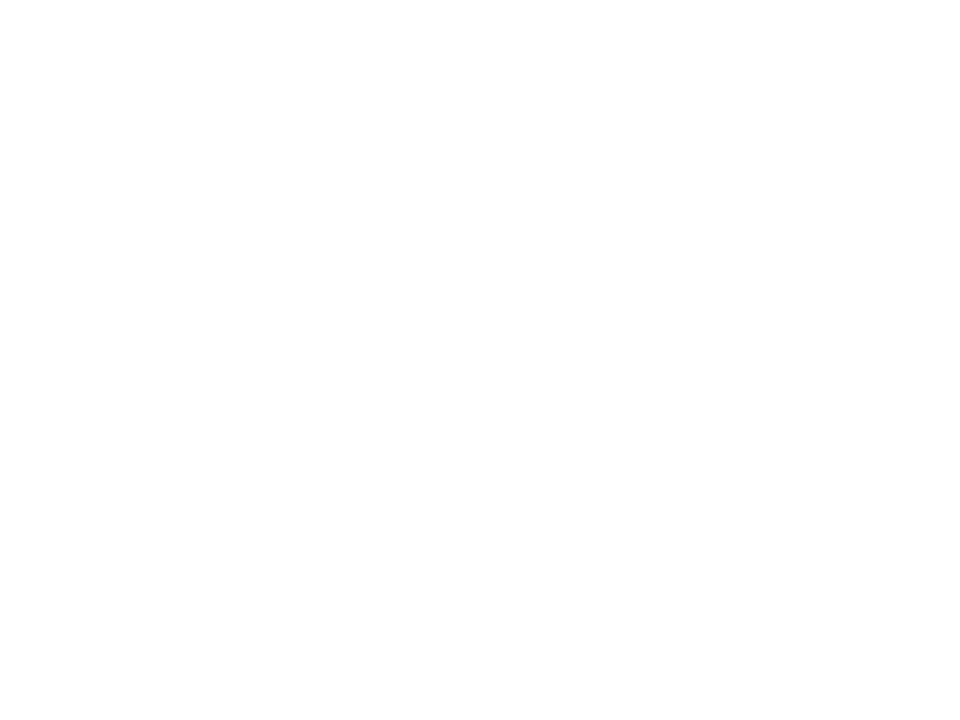

In [19]:
%matplotlib notebook
sns.swarmplot(x='Condition',y='Sucrose',data=df)

The second principal component separates the optimal from the other temperatures.

The talus plot indicates that all the signal must be around 7 principal components.

<IPython.core.display.Javascript object>


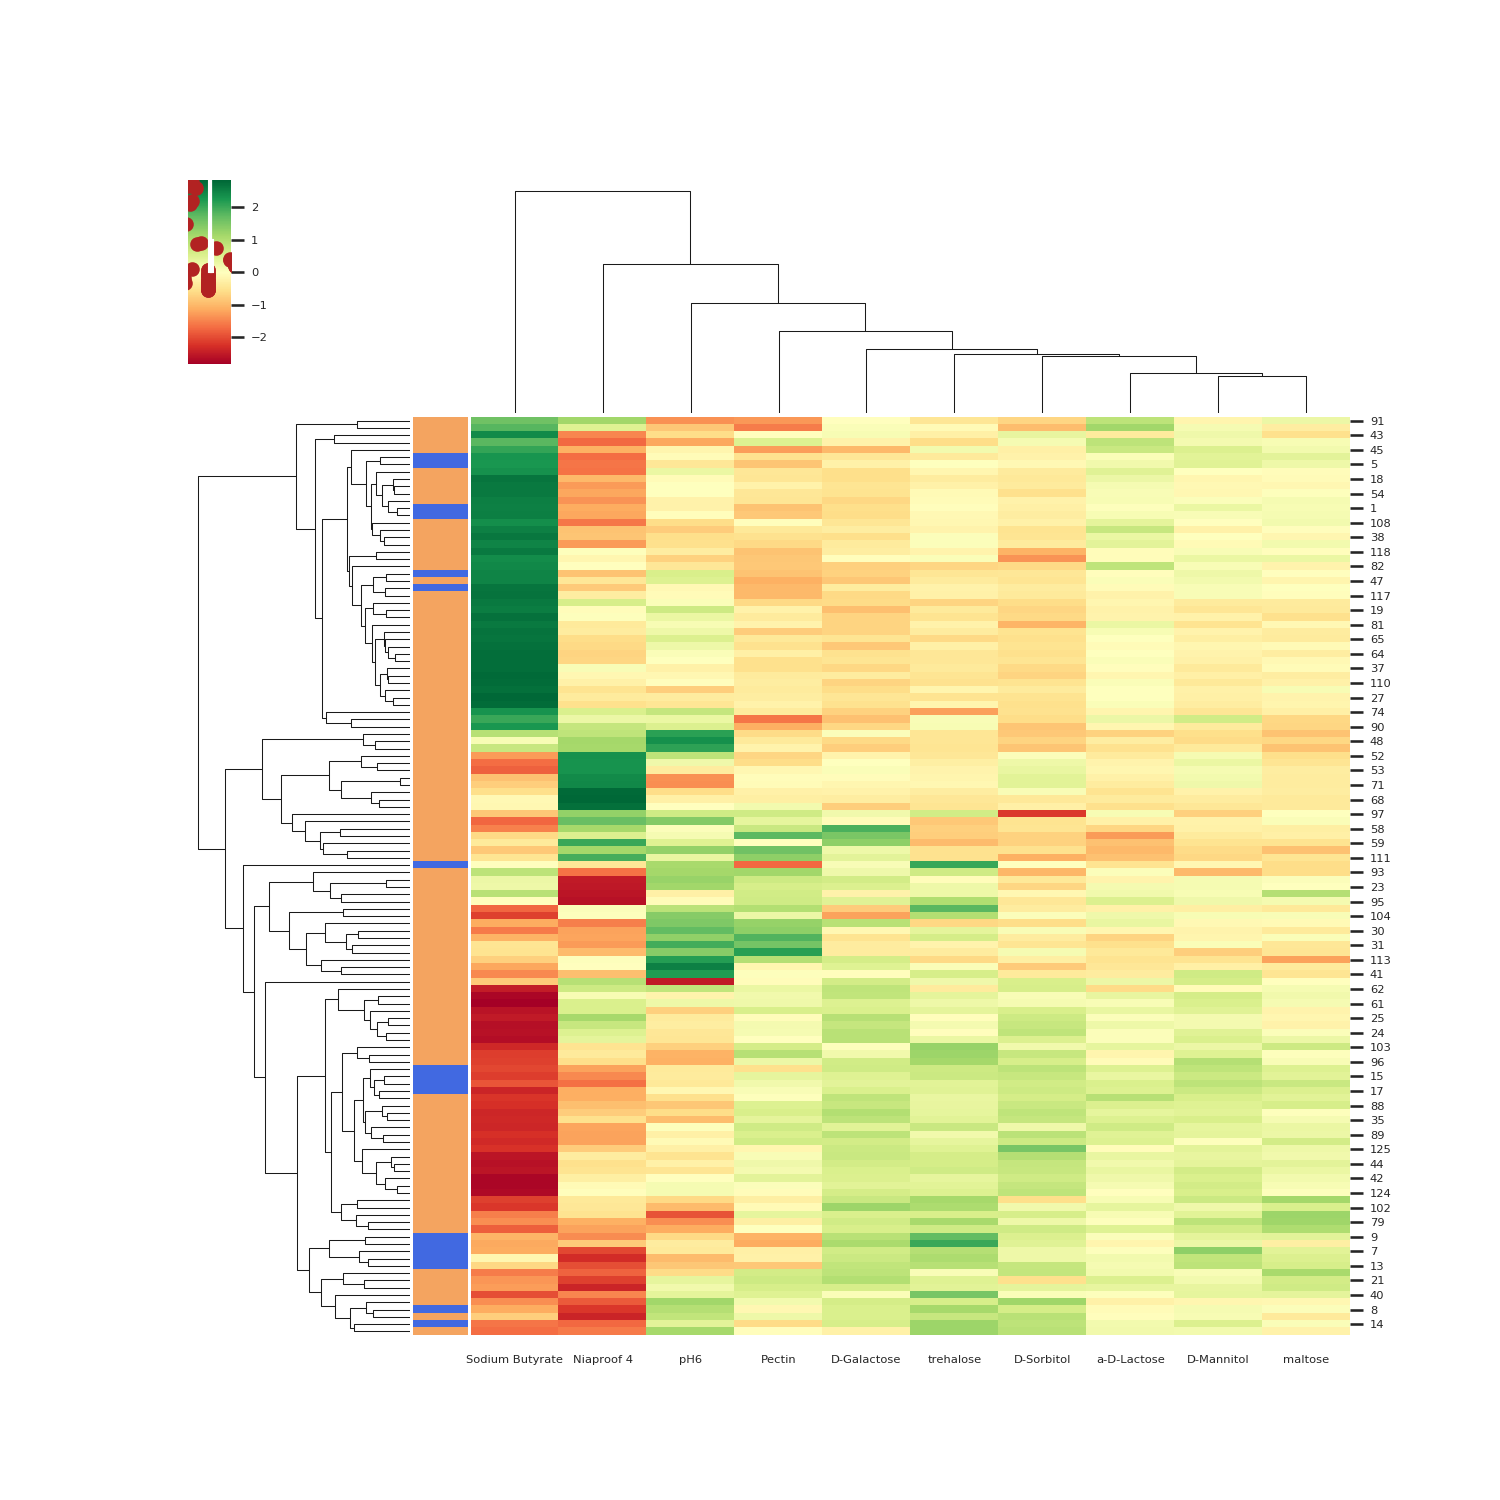

In [32]:
%matplotlib notebook
#Inspect each PC and look at the top wells, cluster them and inspect treatment
loadings = np.absolute(pca.components_)
percent=int(floor(0.9*len(loadings[3])))
order=np.argsort(loadings[3])
pc1=data.iloc[:,order[percent:len(loadings[3])]]
#Color by factor
colors1 =  ['royalblue','sandybrown', 'firebrick']
y1= pd.Series(df.Evolved.values, dtype="category")
lut = dict(zip(y1.unique(), colors1))
colors=y1.map(lut)
#We can see how these variables effectively cluster our data
sns.set(font_scale=0.5) 
sns.clustermap(pc1,cmap="RdYlGn",row_colors=colors.values,z_score=0)
#Save
pp = PdfPages('pc2_clust_607.pdf')
plt.savefig(pp,format='pdf')
pp.close()

We can see that the fourth PC separates the starting strains from the evolved.

In [36]:
#Save loadings for the first PCs
wells=list(data)
pc1_load=pd.DataFrame({'wells': wells, 'loadings': loadings[0]})
pc1_load.to_csv('pc1_loadings_607.csv')
pc2_load=pd.DataFrame({'wells': wells, 'loadings': loadings[1]})python
pc2_load.to_csv('pc2_loadings_607.csv')
pc3_load=pd.DataFrame({'wells': wells, 'loadings': loadings[2]})
pc3_load.to_csv('pc3_loadings_607.csv')
pc4_load=pd.DataFrame({'wells': wells, 'loadings': loadings[3]})
pc4_load.to_csv('pc4_loadings_607.csv')

Look at particular wells

In [22]:
%%capture
#Plot all components
components=pd.DataFrame(X_reduced[:,0:12])
variables=df.iloc[:,0:6]
variables=variables.reset_index()
projected = pd.concat([variables, components], axis=1)
projected['Condition'] = projected['Condition'].astype('category')
projected['Strain'] = projected['Strain'].astype('category')
projected['Treatment'] = projected['Treatment'].astype('category')
projected['Evolved'] = projected['Evolved'].astype('category')
projected=projected.drop(columns=['index'])

g = sns.pairplot(projected, hue="Evolved",diag_kind='hist')
pp = PdfPages('607_all.pdf')
plt.savefig(pp,format='pdf')
pp.close()

# Directionality of adaptation

<IPython.core.display.Javascript object>


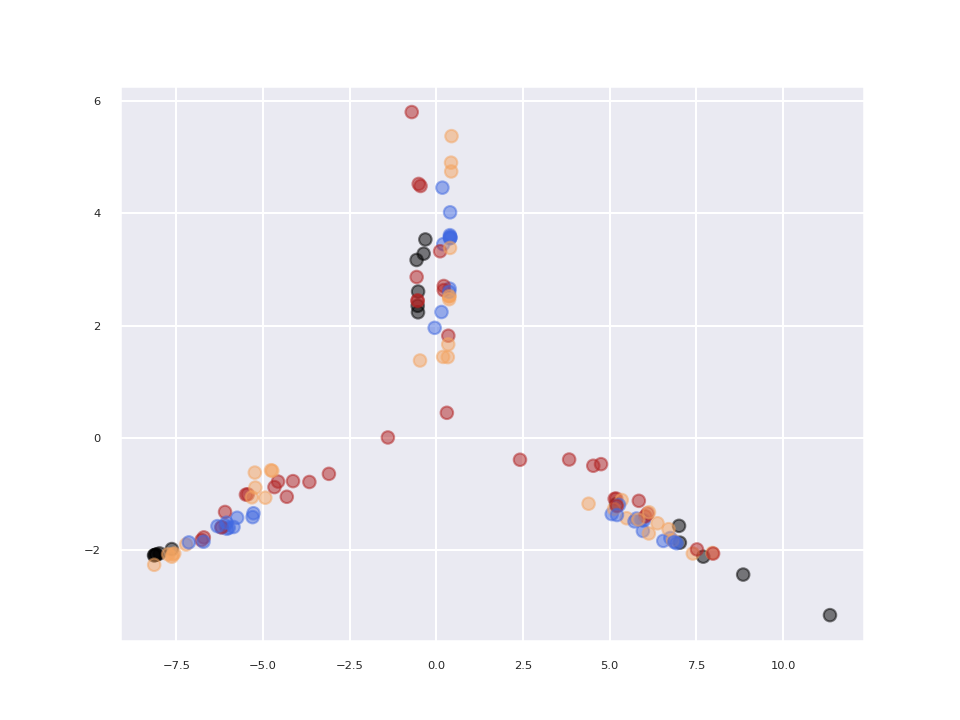

In [123]:
%matplotlib notebook
from sklearn import manifold, datasets
n_neighbors=3
n_components=2
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
#Color by factor
colors1 =  ['black','royalblue','sandybrown', 'firebrick']
y1= pd.Series(df.Treatment, dtype="category")
lut = dict(zip(y1.unique(), colors1))
colors=y1.map(lut)
plt.scatter(Y[:, 0], Y[:, 1], c=colors, alpha=0.5)